<a href="https://colab.research.google.com/github/yz7441/NYU_Integrated_Marketing/blob/main/yz7441_Predicting_Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install pingouin

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/yz7441/Bank_customers_churns/main/Churn%20Modeling.csv')
df=df.dropna()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Correlation


In [ ]:
# install the software
import pingouin as pg

### The pairwise correlation 
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html#pingouin.pairwise_corr

In [ ]:
pg.pairwise_corr(df,columns=['Age', 'Balance'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Age,Balance,pearson,two-sided,10000,0.028,"[0.01, 0.05]",0.001,0.001,0.028,0.005,0.689,0.808


In [ ]:
pg.pairwise_corr(df,columns=['Age', 'Balance','CreditScore'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Age,Balance,pearson,two-sided,10000,0.028,"[0.01, 0.05]",0.001,0.001,0.028,0.005,0.689,0.808
1,Age,CreditScore,pearson,two-sided,10000,-0.004,"[-0.02, 0.02]",0.000,-0.000,-0.004,0.692,0.014,0.068
2,Balance,CreditScore,pearson,two-sided,10000,0.006,"[-0.01, 0.03]",0.000,-0.000,0.006,0.531,0.015,0.096


### The Partial correlation
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [ ]:
# Partial correlation of Age and Balance controlling for CreditScore
x='Age'
y='Balance'
control='CreditScore'
pg.partial_corr(data=df, x=x, y=y, covar=control,
                method='pearson').round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,10000,0.028,"[0.01, 0.05]",0.001,0.001,0.005,0.694,0.809


# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [ ]:
#install the package
import seaborn as sns

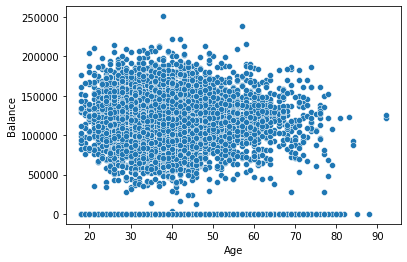

In [ ]:
x='Age'
y='Balance'
sns.scatterplot(data=df, x=x, y=y)

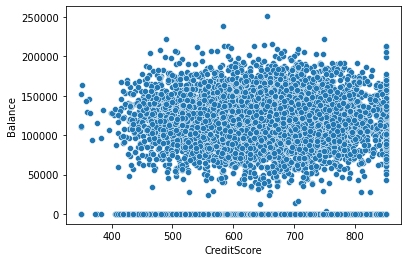

In [ ]:
x='CreditScore'
y='Balance'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [ ]:
import statsmodels.api as sm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# define the dependent and independent variables
X=df[['Age','CreditScore']]
y=df['Balance']


In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,Age,CreditScore
0,1.0,42,619
1,1.0,41,608
2,1.0,42,502
3,1.0,39,699
4,1.0,43,850


In [ ]:
# conduct regression
model = sm.OLS(y, X).fit()

In [ ]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.213
Date:                Wed, 02 Dec 2020   Prob (F-statistic):             0.0148
Time:                        15:31:42   Log-Likelihood:            -1.2460e+05
No. Observations:               10000   AIC:                         2.492e+05
Df Residuals:                    9997   BIC:                         2.492e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.725e+04   4842.899     13.885      

### Check assumptions

In [ ]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,-76874.911219,76874.911219
1,7146.832385,76661.027615
2,83267.842715,76392.957285
3,-76698.737283,76698.737283
4,47515.787011,77995.032989


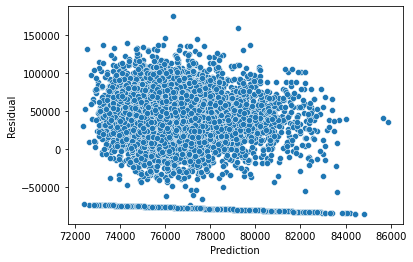

In [ ]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

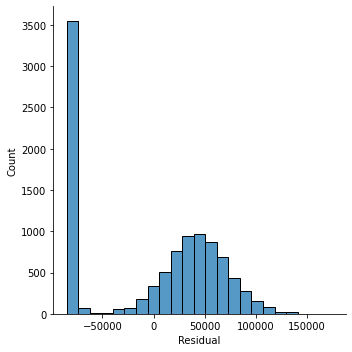

In [ ]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [ ]:
x=df_res['Residual']
pg.normality(x)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



,W,pval,normal
Residual,0.856182,0.0,False


In [ ]:
pg.pairwise_corr(df,columns=['Age','CreditScore'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Age,CreditScore,pearson,two-sided,10000,-0.004,"[-0.02, 0.02]",0.0,-0.0,-0.004,0.692,0.014,0.068


#Logit Analysis

In [ ]:
y=df['Exited']
X=df[['Age','Balance','CreditScore']]

In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,Age,Balance,CreditScore
0,1.0,42,0.00,619
1,1.0,41,83807.86,608
2,1.0,42,159660.80,502
3,1.0,39,0.00,699
4,1.0,43,125510.82,850


In [ ]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.460193
         Iterations 6


In [ ]:
# print model summary
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Dec 2020   Pseudo R-squ.:                 0.08961
Time:                        15:31:43   Log-Likelihood:                -4601.9
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                4.605e-196
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.8612      0.206    -18.740      0.000      -4.265      -3.457
Age             0.0634      0.002     26.581      0.000       0.059       0.068
Balance      5.033e-06   4.33e-07     11.615    

In [ ]:
### get the odds ratio
np.exp(logit_model.params)

const          0.021044
Age            1.065431
Balance        1.000005
CreditScore    0.999229
dtype: float64

In [ ]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

,Pred_prob,y,Prediction
0,0.157516,1,0
1,0.212499,0,0
2,0.313671,1,0
3,0.126896,0,0
4,0.238668,0,0


In [ ]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

0.7804

# Cross Validation

In [ ]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.459270
         Iterations 6


In [ ]:
# print model summary
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7996
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Dec 2020   Pseudo R-squ.:                 0.09033
Time:                        15:31:43   Log-Likelihood:                -3674.2
converged:                       True   LL-Null:                       -4039.0
Covariance Type:            nonrobust   LLR p-value:                7.669e-158
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.8842      0.230    -16.876      0.000      -4.335      -3.433
Age             0.0635      0.003     23.667      0.000       0.058       0.069
Balance      5.271e-06   4.85e-07     10.873    

In [ ]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

,Pred_prob,y_test,Prediction
5035,0.194691,0,0
3211,0.109374,0,0
2345,0.241801,0,0
8204,0.169203,0,0
170,0.150116,0,0


In [ ]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

0.777

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

,predicted_Non_Churn,predicted_Churn
Non-Churn,1525,64
Churn,382,29


#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

0.11507936507936507

# Cross validation for multiple times

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.788 0.795 0.79  0.789 0.785 0.793 0.796 0.788 0.796 0.78 ]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.78, 0.7900000000000001, 0.796)

# Appendix

In [ ]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()